# Saravanan, Karthik Sundaram - Homework 2

**Due: Monday 18th February**

We numerically explore the relationship between error distributions, objective functions (least squares, least absolute deviation, and weighted least squares), and computational speed.

The following simulation creates a data set according to
$$y_i = \beta_1 + \beta_2 x_i + \beta_3 x_i^2 + \epsilon_i.$$

We generate $n$ observations from this model for $x$ on an equally spaced grid $[0,1]$. For $Y^{(t)}$, the errors ($\epsilon_i$) have a t-distribution with 2 degrees of freedom. For $Y^{(n)}$, the errors have a standard normal distribution. For $Y^{(w)}$, the errors are heteroscedastic: $\epsilon_i|\sigma_i^2 \sim N(0,\sigma_i^2)$,  where $\sigma_i \sim 0.1 + \text{Exp}(1)$ (that is, an exponential distribution shifted $0.1$ to the right). We plot each of these data sets and the true regression function.

The t distribution produces a lot of outliers (some outliers are not shown because we restricted the y-axis to ylim in each plot) and there are also a lot of outliers in the case of the heteroscedastic errors. Given the data, out goal is to infer the parameters $\beta$. We will mainly consider two methods. The least squares method we discussed in class is
$$ \beta_{LS} = \text{argmin}_{\beta} (y_i - \beta_1 - \beta_2 x_i - \beta_3 x_i^2)^2 =  \text{argmin}_{\beta} (Y - X\beta)^T(Y - X\beta) = (X^TX)^{-1}X^TY$$
A second possibility is to find the [least absolute deviations](https://en.wikipedia.org/wiki/Least_absolute_deviations) estimator. We call this $\beta_{LAD}$ which has the form
$$\beta_{LAD} = \text{argmin}_{\beta} |y_i - \beta_1 - \beta_2 x_i - \beta_3 x_i^2|.$$
This may also be known as $L_1$ regression or quantile regression with the $0.5$ quantile.

In this homework you will fit both $\beta_{LS}$ and $\beta_{LAD}$ and compare the methods based on parameter estimation accuracy and speed. In the case of the heteroscedastic errors dataset we will also compare to the weighted least squares estimator $\beta_{WLS}= (X^TWX)^{-1}X^TWY$, where $W$ is a diagonal matrix, with the diagonal given by $1/\sigma_i^2$ for $i=1,\dots,n$ (assume that the $\sigma_i$ are known). 

## Question 1

Fixing $X$, generate the $Y^{(t)}$, $Y^{(n)}$, and $Y^{(w)}$ datasets $N=100$ times (note that $n$ is the sample size and $N$ is the number of times we run the simulation). For the  $Y^{(t)}$ and $Y^{(n)}$ datasets, compute $\beta_{LS}$ and $\beta_{LAD}$ each time. Since $\beta$ is a vector of length $3$, this will result in 4 matrices (LS for $Y^{(t)}$ and $Y^{(n)}$ and LAD for $Y^{(t)}$ and $Y^{(n)}$) with $N$ rows and 3 columns (you could store this output in other formats as well, but matrices are convenient). For the $Y^{(w)}$ datasets, compute all three estimators $\beta_{LS}$, $\beta_{LAD}$, and $\beta_{WLS}$, and similarly store them in matrices. 

Make scatterplots of $\beta_2$ versus $\beta_3$ estimates for each data type and each estimator. This will produce seven scatterplots in total. Mark the true $\beta_2$ and $\beta_3$ on each plot and comment of the quality of the estimators in the different settings. Your scatterplots should look similar to the ones below.

**Tips for Fitting** 

- For fitting $\beta_{LS}$, you have many options in R (lm, lm.fit) and python (scipy.linalg.lstsq, sklearn.linear_model.LinearRegression). 
- For fitting $\beta_{LAD}$ in R you can use l1fit from the package L1pack or  rq.fit from quantreg. For fitting $\beta_{LAD}$ in python the options are somewhat more limited:
    * [statsmodels](http://www.statsmodels.org/dev/examples/notebooks/generated/quantile_regression.html) requires use of pandas, calls the quantreg R package
    * generic optimizer such as [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)   
  The later is a more general method that will likely be slower. But scipy.optimize is general and will be useful for many other problems. You may also use any other optimizer you find. 
- For fitting $\beta_{WLS}$ in R you can use for example lm.wfit or lsfit (the latter may be more convenient here). In Python you can use for example the sample_weight option in sklearn.linear_model.LinearRegression or statsmodels.regression.linear_model.WLS. 

In [1]:
set.seed(1234)
n <- 500
x <- seq(from=0,to=1,length.out=n)
X <- cbind(1,x,x^2)
beta <- matrix(c(1,2,4),nrow=3)
Yt <- X%*%beta + rt(n,df=2)
Yn <- X%*%beta + rnorm(n)
sig <- 0.1 + rexp(n) 
Yw <- X%*%beta + rnorm(n,sd=sig)

In [ ]:
options(repr.plot.width=7.5,repr.plot.height=3.5)
par(mar=c(4,4,1,1),mfcol=c(1,2))
ylim <- c(-5,10)
plot(X[,2],Yt,xlab="x",ylab="y",main="t errors",ylim=ylim)
points(X[,2],X%*%beta,type='l',col='red',lwd=2)
plot(X[,2],Yn,xlab="x",ylab="y",main="normal errors",ylim=ylim)
points(X[,2],X%*%beta,type='l',col='red',lwd=2)
plot(X[,2],Yw,xlab="x",ylab="y",main="heteroscedastic errors",ylim=ylim)
points(X[,2],X%*%beta,type='l',col='red',lwd=2)

(requires internet connection to view)

<img src="https://david-jones-statistics.github.io/statcomp/hw/betaT.png">

(requires internet connection to view)

<img src="https://david-jones-statistics.github.io/statcomp/hw/betaNorm.png">

(requires internet connection to view)

<img src="https://david-jones-statistics.github.io/statcomp/hw/betaHet.png">

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pylab 
import warnings
warnings.filterwarnings("ignore")

In [7]:
n=500
beta = [1,2,4]

X = np.linspace(0,1,n)
X = np.array(list(map(lambda z: X**z,np.arange(3))))
X = np.transpose(X)

tLS=[]
nLS=[]
wLS=[]
tLAD=[]
nLAD=[]
wLAD=[]
wWLS =[]

df = pd.DataFrame(X,columns=['b1','b2','b3'])


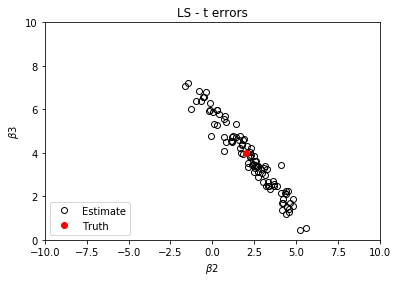

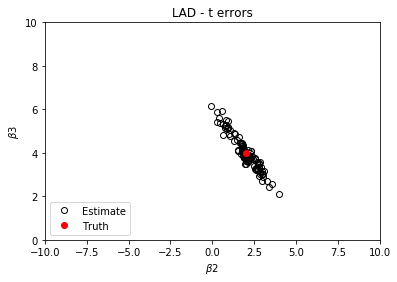

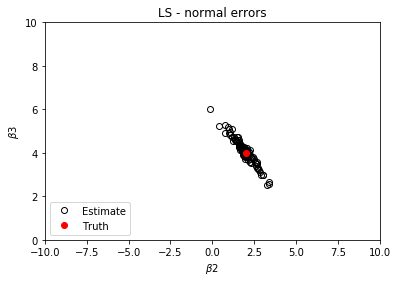

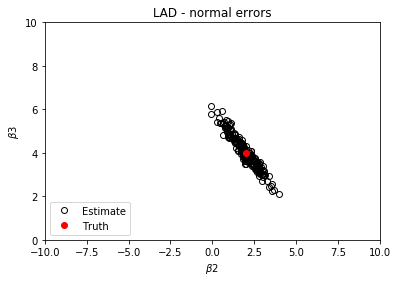

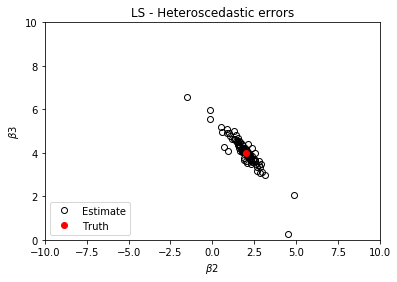

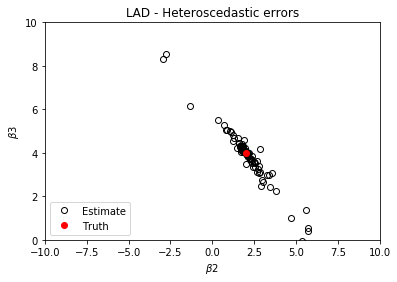

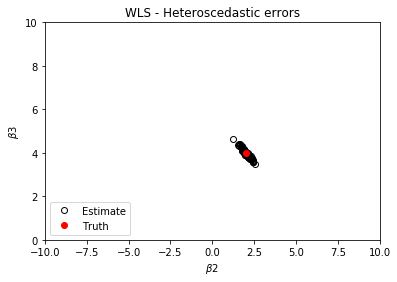

In [8]:



for i in range(1,100):

    y = np.dot(X,beta) + np.random.standard_t(2, size=500)
    model = LinearRegression(fit_intercept=True)

    model.fit(X, y)

    yfit = model.predict(X)
    #yfit
    tLS.append(list(model.coef_))
pylab.plot([i[1] for i in tLS],[i[2] for i in tLS],'o',color='k',markerfacecolor='none',label='Estimate')
pylab.plot([beta[1]],[beta[2]],'ro',label = 'Truth')
pylab.xlim([-10,10])
pylab.ylim([0,10])
pylab.legend(loc='lower left')
pylab.xlabel(r'$\beta$2')
pylab.ylabel(r'$\beta$3')
pylab.title('LS - t errors')
pylab.show()



for i in range(1,100):

    y = np.dot(X,beta) + np.random.standard_t(2, size=500)
    df['y'] = y
    mod = smf.quantreg('y ~ b2 + I(b2 ** 2.0)', df)
    res = mod.fit(q=.5)
    #print(res.summary())
    res.params['b2'],res.params['I(b2 ** 2.0)']
    #yfit
    tLAD.append([res.params['b2'],res.params['I(b2 ** 2.0)']])

pylab.plot([i[0] for i in tLAD],[i[1] for i in tLAD],'o',color='k',markerfacecolor='none',label='Estimate')
pylab.plot([beta[1]],[beta[2]],'ro',label = 'Truth')
pylab.xlim([-10,10])
pylab.ylim([0,10])
pylab.legend(loc='lower left')
pylab.xlabel(r'$\beta$2')
pylab.ylabel(r'$\beta$3')
pylab.title('LAD - t errors')
pylab.show()



for i in range(1,100):

    y = np.dot(X,beta) + np.random.normal(0, 1, 500)
    model = LinearRegression(fit_intercept=True)

    model.fit(X, y)

    yfit = model.predict(X)
    #yfit
    nLS.append(list(model.coef_))

pylab.plot([i[1] for i in nLS],[i[2] for i in nLS],'o',color='k',markerfacecolor='none',label='Estimate')
pylab.plot([beta[1]],[beta[2]],'ro',label = 'Truth')
pylab.xlim([-10,10])
pylab.ylim([0,10])
pylab.legend(loc='lower left')
pylab.xlabel(r'$\beta$2')
pylab.ylabel(r'$\beta$3')
pylab.title('LS - normal errors')
pylab.show()



for i in range(1,100):

    y = np.dot(X,beta) + np.random.normal(0, 1, 500)
    df['y'] = y
    mod = smf.quantreg('y ~ b2 + I(b2 ** 2.0)', df)
    res = mod.fit(q=.5)
    #print(res.summary())
    res.params['b2'],res.params['I(b2 ** 2.0)']
    #yfit
    tLAD.append([res.params['b2'],res.params['I(b2 ** 2.0)']])
    
pylab.plot([i[0] for i in tLAD],[i[1] for i in tLAD],'o',color='k',markerfacecolor='none',label='Estimate')
pylab.plot([beta[1]],[beta[2]],'ro',label = 'Truth')
pylab.xlim([-10,10])
pylab.ylim([0,10])
pylab.legend(loc='lower left')
pylab.xlabel(r'$\beta$2')
pylab.ylabel(r'$\beta$3')
pylab.title('LAD - normal errors')
pylab.show()



for i in range(1,100):

    y = np.dot(X,beta) + np.random.normal(0,0.1+np.random.exponential(1), 500)
    model = LinearRegression(fit_intercept=True)

    model.fit(X, y)

    yfit = model.predict(X)
    #yfit
    wLS.append(list(model.coef_))

pylab.plot([i[1] for i in wLS],[i[2] for i in wLS],'o',color='k',markerfacecolor='none',label='Estimate')
pylab.plot([beta[1]],[beta[2]],'ro',label = 'Truth')
pylab.xlim([-10,10])
pylab.ylim([0,10])
pylab.legend(loc='lower left')
pylab.xlabel(r'$\beta$2')
pylab.ylabel(r'$\beta$3')
pylab.title('LS - Heteroscedastic errors')
pylab.show()



for i in range(1,100):

    y = np.dot(X,beta) + np.random.normal(0,0.1+np.random.exponential(1), 500)
    df['y'] = y
    mod = smf.quantreg('y ~ b2 + I(b2 ** 2.0)', df)
    res = mod.fit(q=.5)
    #print(res.summary())
    res.params['b2'],res.params['I(b2 ** 2.0)']
    #yfit
    wLAD.append([res.params['b2'],res.params['I(b2 ** 2.0)']])

pylab.plot([i[0] for i in wLAD],[i[1] for i in wLAD],'o',color='k',markerfacecolor='none',label='Estimate')
pylab.plot([beta[1]],[beta[2]],'ro',label = 'Truth')
pylab.xlim([-10,10])
pylab.ylim([0,10])
pylab.legend(loc='lower left')
pylab.xlabel(r'$\beta$2')
pylab.ylabel(r'$\beta$3')
pylab.title('LAD - Heteroscedastic errors')
pylab.show()


for i in range(1,100):
    sig = 0.1+np.random.exponential(1,500)
    y = np.dot(X,beta) + np.random.normal(0,sig, 500)

    wls_model = sm.WLS(y,X, weights=1/pow(sig,2))
    results = wls_model.fit()
    
    wWLS.append(results.params)

pylab.plot([i[1] for i in wWLS],[i[2] for i in wWLS],'o',color='k',markerfacecolor='none',label='Estimate')
pylab.plot([beta[1]],[beta[2]],'ro',label = 'Truth')
pylab.xlim([-10,10])
pylab.ylim([0,10])
pylab.legend(loc='lower left')
pylab.xlabel(r'$\beta$2')
pylab.ylabel(r'$\beta$3')
pylab.title('WLS - Heteroscedastic errors')
pylab.show()

### Inference:

- For t-errors model, LS is better as it more clustered/less spread around the actual beta values used earlier.
- For the normal distrbution model, LAD is better as it more clustered/less spread around the actual beta values used earlier.
- For Heteroskedastic error model, WLS is better as it more clustered/less spread around the actual beta values used earlier.


## Question 2

Compare the speed of $\beta_{LS}$ to $\beta_{LAD}$ using a package such as microbenchmark in R or some of the tools [here](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html) in python. Empirically determine the computational complexity (in $n$) of $\beta_{LAD}$ and $\beta_{LS}$ (we know from theoretical analysis that $\widehat{\beta}_{LS}$ should be linear in $n$).

### LS - t errors

In [9]:

y = np.dot(X,beta) + np.random.standard_t(2, size=500)
model = LinearRegression(fit_intercept=True)


In [10]:
%%timeit
model.fit(X, y)

578 µs ± 14.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### LAD - t errors

In [11]:

y = np.dot(X,beta) + np.random.standard_t(2, size=500)
df['y'] = y
mod = smf.quantreg('y ~ b2 + I(b2 ** 2.0)', df)



In [12]:
%%timeit
res = mod.fit(q=.5)

80.9 ms ± 2.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### LS - normal errors

In [13]:

y = np.dot(X,beta) + np.random.normal(0, 1, 500)
model = LinearRegression(fit_intercept=True)

In [14]:
%%timeit
model.fit(X, y)

601 µs ± 19.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### LAD - normal errors

In [15]:

y = np.dot(X,beta) + np.random.normal(0, 1, 500)
df['y'] = y
mod = smf.quantreg('y ~ b2 + I(b2 ** 2.0)', df)


In [16]:
%%timeit
res = mod.fit(q=.5)

47.6 ms ± 6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### LS - Heteroscedastic errors

In [17]:

y = np.dot(X,beta) + np.random.normal(0,0.1+np.random.exponential(1), 500)
model = LinearRegression(fit_intercept=True)


In [18]:
%%timeit
model.fit(X, y)

563 µs ± 23.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### LAD - Heteroscedastic errors

In [19]:

y = np.dot(X,beta) + np.random.normal(0,0.1+np.random.exponential(1), 500)
df['y'] = y
mod = smf.quantreg('y ~ b2 + I(b2 ** 2.0)', df)


In [20]:
%%timeit
res = mod.fit(q=.5)

50.9 ms ± 2.66 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Beta LS

In [90]:
func1_time = []
for i in [1000,5000,20000,100000]:
    X = np.linspace(0,1,i)
    X = np.array(list(map(lambda z: X**z,np.arange(3))))
    X = np.transpose(X)
    y = np.dot(X,beta) + np.random.normal(0, 1, i)
    model = LinearRegression(fit_intercept=True)
    
    foo =  %timeit -o model.fit(X, y)
    func1_time.append([i,foo.average])

613 µs ± 37.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
860 µs ± 20.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.52 ms ± 25.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
12.9 ms ± 340 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


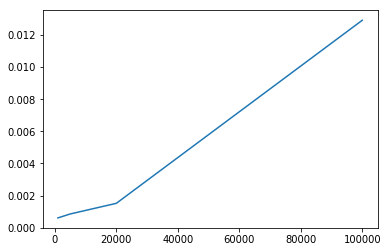

In [92]:
plt.plot([i[0] for i in func1_time],[i[1] for i in func1_time])

### Beta LAD

In [86]:
func2_time = []
for i in [1000,5000,20000,100000]:
    print(i)
    X = np.linspace(0,1,i)
    X = np.array(list(map(lambda z: X**z,np.arange(3))))
    X = np.transpose(X)
    y = np.dot(X,beta) + np.random.normal(0, 1, i)
    df = pd.DataFrame(X,columns=['b1','b2','b3'])
    df['y'] = y
    mod = smf.quantreg('y ~ b2 + I(b2 ** 2.0)', df)
    foo =  %timeit -o mod.fit(q=.5)
    #print(res.summary())
    func2_time.append([i,foo.average])

1000
18.8 ms ± 941 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5000
105 ms ± 2.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
20000
197 ms ± 8.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
100000
2.04 s ± 38.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


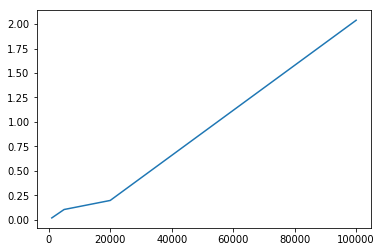

In [89]:
plt.plot([i[0] for i in func2_time],[i[1] for i in func2_time])

### conclusion

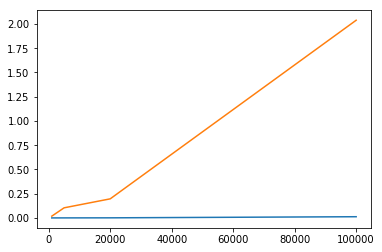

In [93]:
plt.plot([i[0] for i in func1_time],[i[1] for i in func1_time])
plt.plot([i[0] for i in func2_time],[i[1] for i in func2_time])

On comparing the above 2 plots overlapped, a conclusion that LAD is O(nlog(n)) and LS is O(n) is arrived at